In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df_eda = pd.read_csv('../datasets/Road Traffic Accidents/RTA Dataset.csv')


In [11]:
df_eda.duplicated().sum()

0

In [3]:
df_eda.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [8]:
df_eda.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def eda_feature(df: pd.DataFrame, feature: str):
    """
    Melakukan eksplorasi data pada satu fitur
    :param df: DataFrame
    :param feature: Nama fitur yang akan dianalisis
    """
    if feature not in df.columns:
        print(f"Fitur '{feature}' tidak ditemukan dalam DataFrame.")
        return
    
    print(f"\nAnalisis untuk fitur: {feature}\n")
    
    # Cek missing values
    missing = df[feature].isnull().sum()
    print(f"Missing values: {missing}")
    
    # Statistik Deskriptif
    print("\nStatistik deskriptif:")
    print(df[feature].describe())
    
    # Visualisasi Distribusi
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribusi {feature}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot {feature}')
    plt.show()
    
    # Cek Outlier dengan IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()
    print(f"Jumlah outlier: {outliers}\n")

def check_correlation(df: pd.DataFrame, feature: str):
    """
    Menghitung dan menampilkan korelasi fitur tertentu dengan fitur lainnya
    :param df: DataFrame
    :param feature: Nama fitur yang akan dianalisis korelasinya
    """
    if feature not in df.columns:
        print(f"Fitur '{feature}' tidak ditemukan dalam DataFrame.")
        return
    
    corr_series = df.corr()[feature].drop(feature)
    print(corr_series.sort_values(ascending=False))



Analisis untuk fitur: Day_of_week

Missing values: 0

Statistik deskriptif:
count      12316
unique         7
top       Friday
freq        2041
Name: Day_of_week, dtype: object


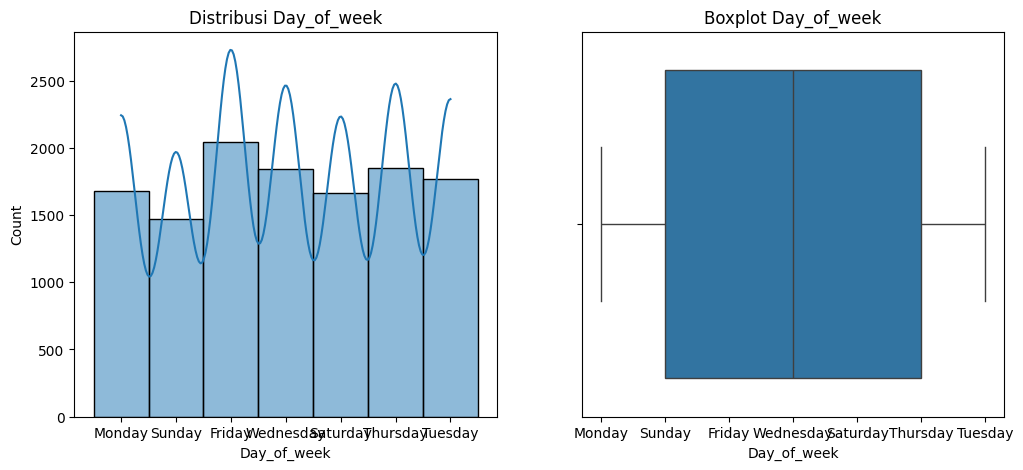

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [9]:
eda_feature(df_eda, 'Day_of_week')